In [1]:
#pip install pycoingecko
#Uncomment if you need to install pycoingecko

In [2]:
from pycoingecko import CoinGeckoAPI

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import matplotlib.ticker as ticker

In [4]:
cg = CoinGeckoAPI()

In [52]:
class CryptoDataAnalyzer:
    def __init__(self):
        self.cg = CoinGeckoAPI()

    def get_crypto_data(self, identifier, start_date, end_date):
        data = self.cg.get_coin_market_chart_range_by_id(id=identifier,
                                                         vs_currency='sgd',
                                                         from_timestamp=start_date.timestamp(),
                                                         to_timestamp=end_date.timestamp())
        prices = data['prices']
        market_caps = data['market_caps']
        total_volumes = data['total_volumes']

        df = pd.DataFrame(prices, columns=['dates', f'{identifier}_price'])
        df['dates'] = pd.to_datetime(df['dates'], unit='ms')
        df.set_index('dates', inplace=True)

        df['market_cap'] = [cap[1] for cap in market_caps]
        df['total_volume'] = [vol[1] for vol in total_volumes]

        return df
    
    def generate_line_plot_prices(self, dataframes, timeframe):
        for identifier, df in dataframes.items():
            plt.figure(figsize=(12, 6))
            plt.title(f'{identifier} Prices ({timeframe[0]} - {timeframe[1]})')
            plt.plot(df.index, df[f'{identifier}_price'], label=f'{identifier} Price (SGD)')
            plt.xlabel('Date')
            plt.ylabel('Value (SGD)')
            plt.legend()
            plt.grid(True)
            plt.show()
    
    def generate_line_plot_market_cap(self, dataframes, timeframe):
        for identifier, df in dataframes.items():
            plt.figure(figsize=(12, 6))
            plt.title(f'{identifier} Market Cap ({timeframe[0]} - {timeframe[1]})')
            plt.plot(df.index, df['market_cap'], label=f'{identifier} Market Cap (SGD)')
            plt.xlabel('Date')
            plt.ylabel('Value (SGD)')
            plt.legend()
            plt.grid(True)
            plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: '{:.0f}M'.format(x * 1e-6)))
            plt.show()

    def generate_line_plot_total_volume(self, dataframes, timeframe):
        for identifier, df in dataframes.items():
            plt.figure(figsize=(12, 6))
            plt.title(f'{identifier} Total Volume ({timeframe[0]} - {timeframe[1]})')
            plt.plot(df.index, df['total_volume'], label=f'{identifier} Total Volume (SGD)')
            plt.xlabel('Date')
            plt.ylabel('Value (SGD)')
            plt.legend()
            plt.grid(True)
            plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: '{:.0f}M'.format(x * 1e-6)))
            plt.show()


In [53]:
crypto_analyzer = CryptoDataAnalyzer()
start_date = datetime.datetime(2021, 12, 25)
end_date = datetime.datetime(2022, 12, 25)

In [54]:
# Creating each individual dataframes for each Crypto Coin
dataframe_eth = crypto_analyzer.get_crypto_data('ethereum', start_date, end_date)
dataframe_btc = crypto_analyzer.get_crypto_data('bitcoin', start_date, end_date)
dataframe_usdc = crypto_analyzer.get_crypto_data('axlusdc', start_date, end_date)
dataframe_axs = crypto_analyzer.get_crypto_data('axie-infinity', start_date, end_date)

In [55]:
dataframe_usdc

,axlusdc_price,market_cap,total_volume
dates,,,
2022-07-19,1.390606,0.0,5.599908e+05
2022-07-20,1.390606,0.0,5.599908e+05
2022-07-21,1.389194,0.0,5.861712e+05
2022-07-22,1.308068,0.0,5.464750e+05
2022-07-23,1.387935,0.0,6.002987e+05
...,...,...,...
2022-12-20,1.353875,0.0,4.469298e+06
2022-12-21,1.353098,0.0,4.815822e+06
2022-12-22,1.353639,0.0,4.153992e+06


In [56]:
# Create a dictionary of dataframes for each cryptocurrency
dataframes = {
    'ethereum': dataframe_eth,
    'bitcoin': dataframe_btc,
    'axlusdc': dataframe_usdc,
    'axie-infinity': dataframe_axs
}

timeframe = (start_date, end_date)

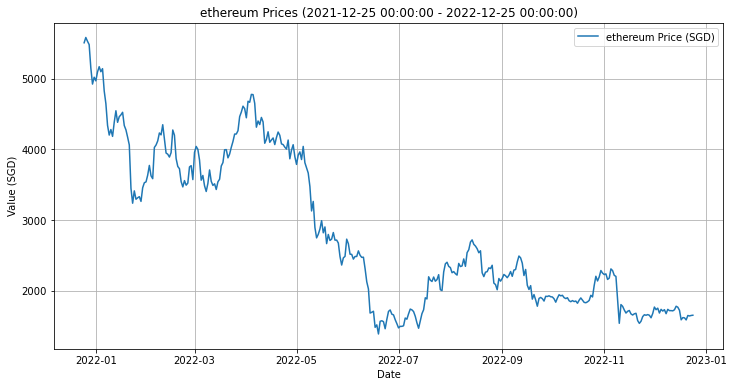

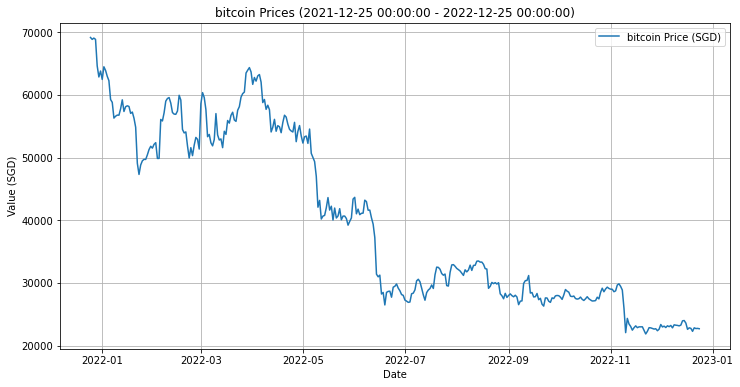

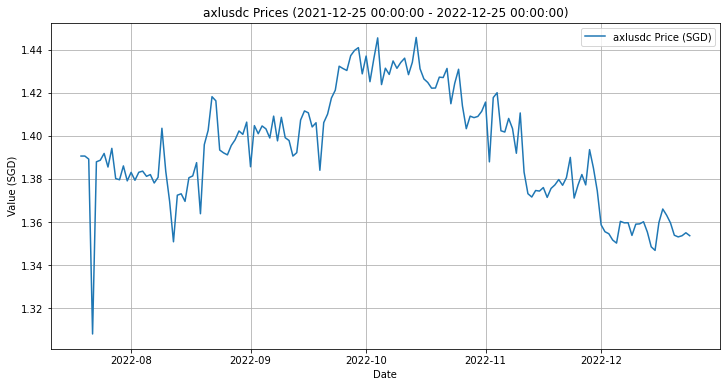

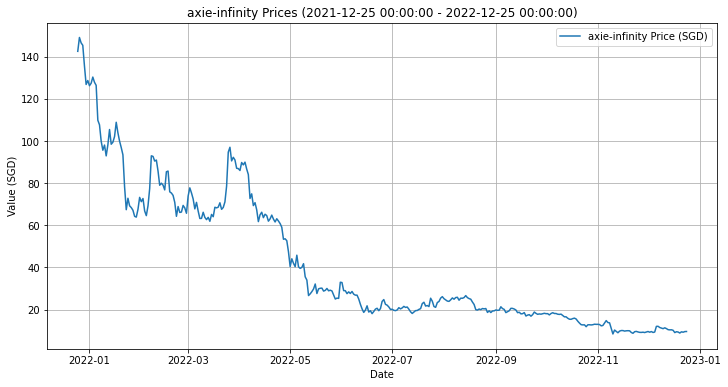

In [57]:
crypto_analyzer.generate_line_plot_prices(dataframes, timeframe)

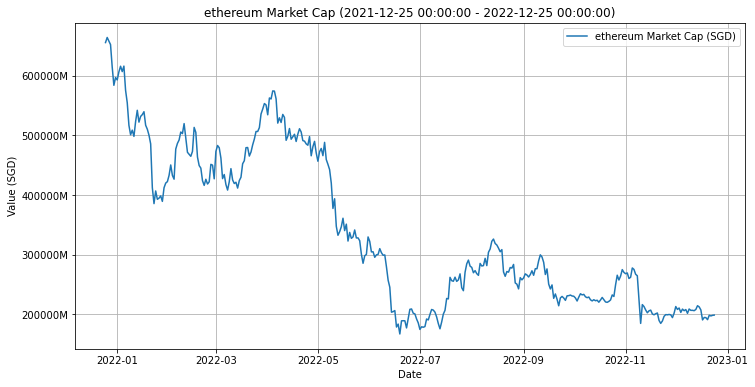

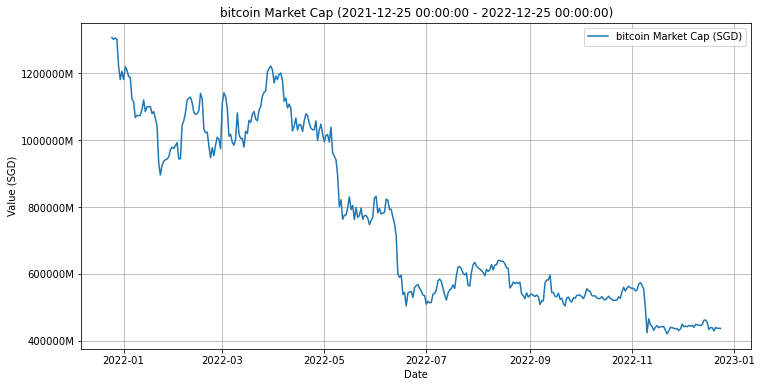

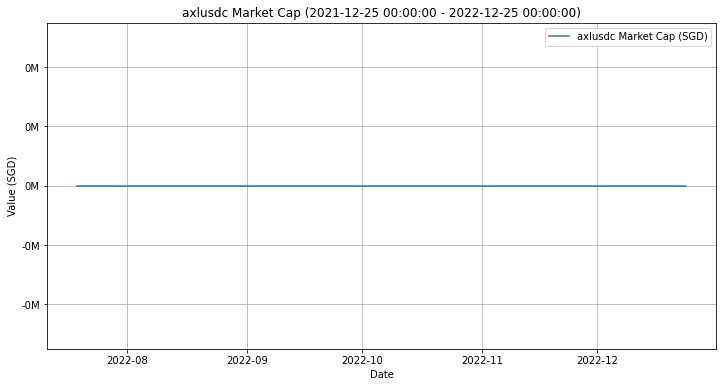

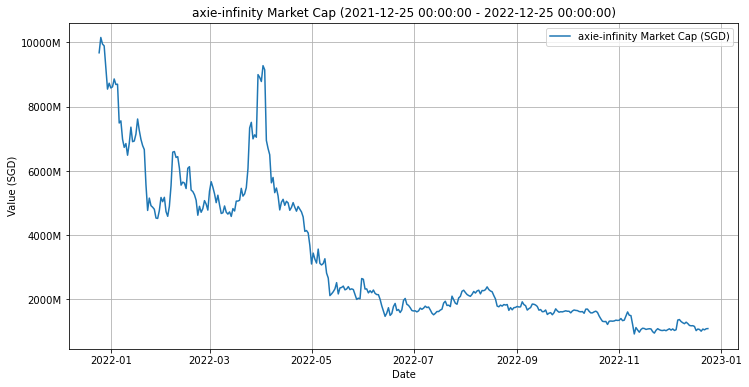

In [58]:
crypto_analyzer.generate_line_plot_market_cap(dataframes, timeframe)